## Problem Statement - Credit Risk Classification using Support Vector Machine

Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to be considered before approving the loan of an applicant. A  bank’s revenue pattern depends on the saving accounts and loans they offer. Once an account holder puts money in their saving account, they get certain interest on their account balance. The bank keeps some part of these balances in reserve to make payments in case of withdrawals. The rest of the money is given as loans to borrowers. The interest put on loan is the revenue earned by the banks. Therefore taking into consideration the factors that will decide whether a person will pay back the loan or not is crucial for banks. This is a common credit risk problem which is solved using analytics. While receiving application of a borrower, the bank asks certain details about the applicant. The general factors that help predict loan default are income, occupation, age, loan amount etc of the applicant.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Data: 

- Variable Description 
    - GoodCredit: Whether the issued loan was a good decision or bad
    - checkingstatus: Status of existing checking account.
    - duration: Duration of loan in months
    - history: Credit history of the applicant
    - purpose: Purpose for the loan
    - amount: Credit amount
    - savings: Savings account/bonds
    - employ: Present employment since
    - installment: Installment rate in percentage of disposable income
    - status: Personal status and sex
    - others: Other debtors / guarantors for the applicant
    - residence: Present residence since
    - property: Property type of applicant
    - age: Age in years
    - otherplans: Other installment plans
    - housing: Housing
    - cards: Number of existing credits at this bank
    - job: Job
    - liable: Number of people being liable to provide maintenance for
    - tele: Is the Telephone registered or not
    - foreign: Is the applicant a foreign worker

### What is SVM

Support Vector Machines (SVMs in short) are supervised machine learning algorithms that are used for classification and regression purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick. It enable us to implicitly map the inputs into high dimensional feature spaces.

### How does SVM Work

- Hyperplane

    A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the maximum margin hyperplane and the linear classifier it defines is known as the maximum margin classifier.
    
- Support Vectors

    Support vectors are the sample data points, which are closest to the hyperplane. These data points will define the separating line or hyperplane better by calculating margins.
    
- Margin

    A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

In SVMs, our main goal is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. 

SVM searches for the maximum margin hyperplane using the following  steps –

- Generate hyperplanes which segregates the classes in the best possible way. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

- Choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the maximum margin hyperplane and the linear classifier it defines is known as a maximum margin classifier.

### Kernel

When the sample data points are very dispersed, it is not possible to separate them using a linear hyperplane. In such a situation, SVMs uses a kernel trick to transform the input space to a higher dimensional space. It uses a mapping function to transform the 2-D input space into the 3-D input space. Then, data points can be easilty seggregated using linear separation.

In practice, kernel is just a function that maps the data to a higher dimension where data is separable. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

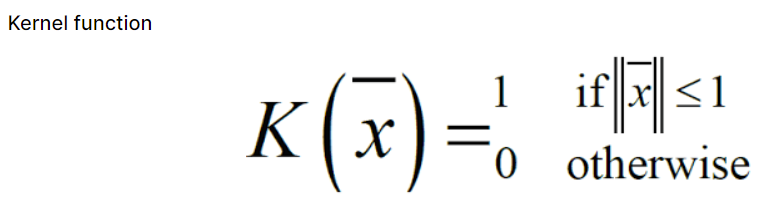

### Types of kernels

- Linear kernel

    Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes. Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time. Linear kernel functions are faster than other functions. 
    
    Linear Kernel formula:F(x,x_j) = sum(x.x_j), here x.x_j represents the data that we are trying to classify.
    
    
- Polynomial Kernel

    Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples. Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems. 
    
    Polynomial kernel formula: F(x,x_j) = (x.x_j+1)^d
    
    Here ‘.’ shows the dot product of both the values, and d denotes the degree.  F(x,x_j) representing the decision boundary to separate the given classes. 
    
    
- Gaussian Radial Basis Function (RBF) 

     It is one of the most preferred and used kernel functions in svm. It is usually chosen for non-linear data. It helps to make proper separation when there is no prior knowledge of data.
     
     Gaussian Radial Basis Formula:F(x, x_j) = exp(-gamma * ||x - x_j||^2)

    Here the value of gamma varies from 0 to 1. We have to manually provide the value of gamma in the code. The most preferred value for gamma is 0.1.

   
- Sigmoid kernel

    Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. This kernel function is similar to a two-layer perceptron model of the neural network, which works as an activation function for neurons.
    
    Sigmoid Kenel Function:F(x, x_j) = tanh(αxay + c)
    
    
- Gaussian kernel 

    It is a commonly used kernel. It is used when there is no prior knowledge of a given dataset.
   
    Gaussian kernel Function:k(x,y)=exp(-(||x-y||^2)/(2*sigma^2))
    
    
- Bessel function kernel
    
    It is mainly used for removing the cross term in mathematical functions.

### Import libraries

In [1]:
import numpy as np 
import pandas as pd
import os
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler

### Load the data

In [2]:
df = pd.read_csv("CreditRiskData.csv")
#look at the top 10 rows of data 
df.head(10)


,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,...,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,...,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,...,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,...,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,...,2,A123,28,A143,A152,2,A174,1,A191,A201


In [3]:
#look at the bottom 10 rows
df.tail(10)


,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
990,0,A14,12,A34,A46,3565,A65,A72,2,A93,...,1,A122,37,A143,A152,2,A172,2,A191,A201
991,0,A14,15,A31,A43,1569,A62,A75,4,A93,...,4,A123,34,A141,A152,1,A172,2,A191,A201
992,0,A11,18,A32,A43,1936,A65,A74,2,A94,...,4,A123,23,A143,A151,2,A172,1,A191,A201
993,0,A11,36,A32,A42,3959,A61,A71,4,A93,...,3,A122,30,A143,A152,1,A174,1,A192,A201
994,0,A14,12,A32,A40,2390,A65,A75,4,A93,...,3,A123,50,A143,A152,1,A173,1,A192,A201
995,0,A14,12,A32,A42,1736,A61,A74,3,A92,...,4,A121,31,A143,A152,1,A172,1,A191,A201
996,0,A11,30,A32,A41,3857,A61,A73,4,A91,...,4,A122,40,A143,A152,1,A174,1,A192,A201
997,0,A14,12,A32,A43,804,A61,A75,4,A93,...,4,A123,38,A143,A152,1,A173,1,A191,A201
998,1,A11,45,A32,A43,1845,A61,A73,4,A93,...,4,A124,23,A143,A153,1,A173,1,A192,A201
999,0,A12,45,A34,A41,4576,A62,A71,3,A93,...,4,A123,27,A143,A152,1,A173,1,A191,A201


### Explorartory Data Analysis

In [4]:
#check the size of data set
df.shape

(1000, 21)

We can see that there are 1000 instances and 21 variables in the data set.

In [5]:
#identify the data type of variables in the data 
#any date values, if they are object type, need to be converted to DateTime 
#df.dtypes

# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

There are 13 categorical variables and 8 discrete variables, including 'GoodCredit' which is the target variable. 
Categorical variables cause inconsistency to the model. Hence we will use Encoding methods to convert them.

Also  no missing values in the dataset. 

In [6]:
df.isnull().sum()

GoodCredit        0
checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
dtype: int64

Since there are no missing values, we can move on with our analysis. Else we would have to drop or impute values.

In [7]:
# get the categorical column names
categorical_cols = []

for k in dict(df.dtypes):
    if dict(df.dtypes)[k] in ['object']:
        categorical_cols.append(k)
        
        
categorical_cols

['checkingstatus',
 'history',
 'purpose',
 'savings',
 'employ',
 'status',
 'others',
 'property',
 'otherplans',
 'housing',
 'job',
 'tele',
 'foreign']

In [8]:
len(categorical_cols)

13

In [9]:
# get the numeric column names
numeric_cols = []

for k in dict(df.dtypes):
    if dict(df.dtypes)[k] in ['float64','float32','int64','int32']:
        numeric_cols.append(k)        
        
numeric_cols

['GoodCredit',
 'duration',
 'amount',
 'installment',
 'residence',
 'age',
 'cards',
 'liable']

In [10]:
len(numeric_cols)

8

In [11]:
# check distribution of target variable
df['GoodCredit'].value_counts()

0    700
1    300
Name: GoodCredit, dtype: int64

In [12]:
# view the percentage distribution of target column

df['GoodCredit'].value_counts()/np.float64(len(df))

0    0.7
1    0.3
Name: GoodCredit, dtype: float64

We can see that percentage of observations of the class label 0 and 1 is 90.84% and 9.16%. So, this is a class imbalanced problem.

In [13]:
#check summary of data variables
#describe() is used to view some basic statistical details like count, 
#percentiles, mean, std, and maximum value of a data frame or a series of numeric values. 
#As it gives the count of each variable, we can identify the missing values using this method.
round(df.describe(),2)

,GoodCredit,duration,amount,installment,residence,age,cards,liable
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,0.30,20.90,3271.26,2.97,2.84,35.55,1.41,1.16
std,0.46,12.06,2822.74,1.12,1.10,11.38,0.58,0.36
min,0.00,4.00,250.00,1.00,1.00,19.00,1.00,1.00
25%,0.00,12.00,1365.50,2.00,2.00,27.00,1.00,1.00
50%,0.00,18.00,2319.50,3.00,3.00,33.00,1.00,1.00
75%,1.00,24.00,3972.25,4.00,4.00,42.00,2.00,1.00
max,1.00,72.00,18424.00,4.00,4.00,75.00,4.00,2.00


On closer inspection, we can suspect that all the continuous variables may contain outliers.

###### Visualization for outliers analysis

Text(0, 0.5, 'Liable')

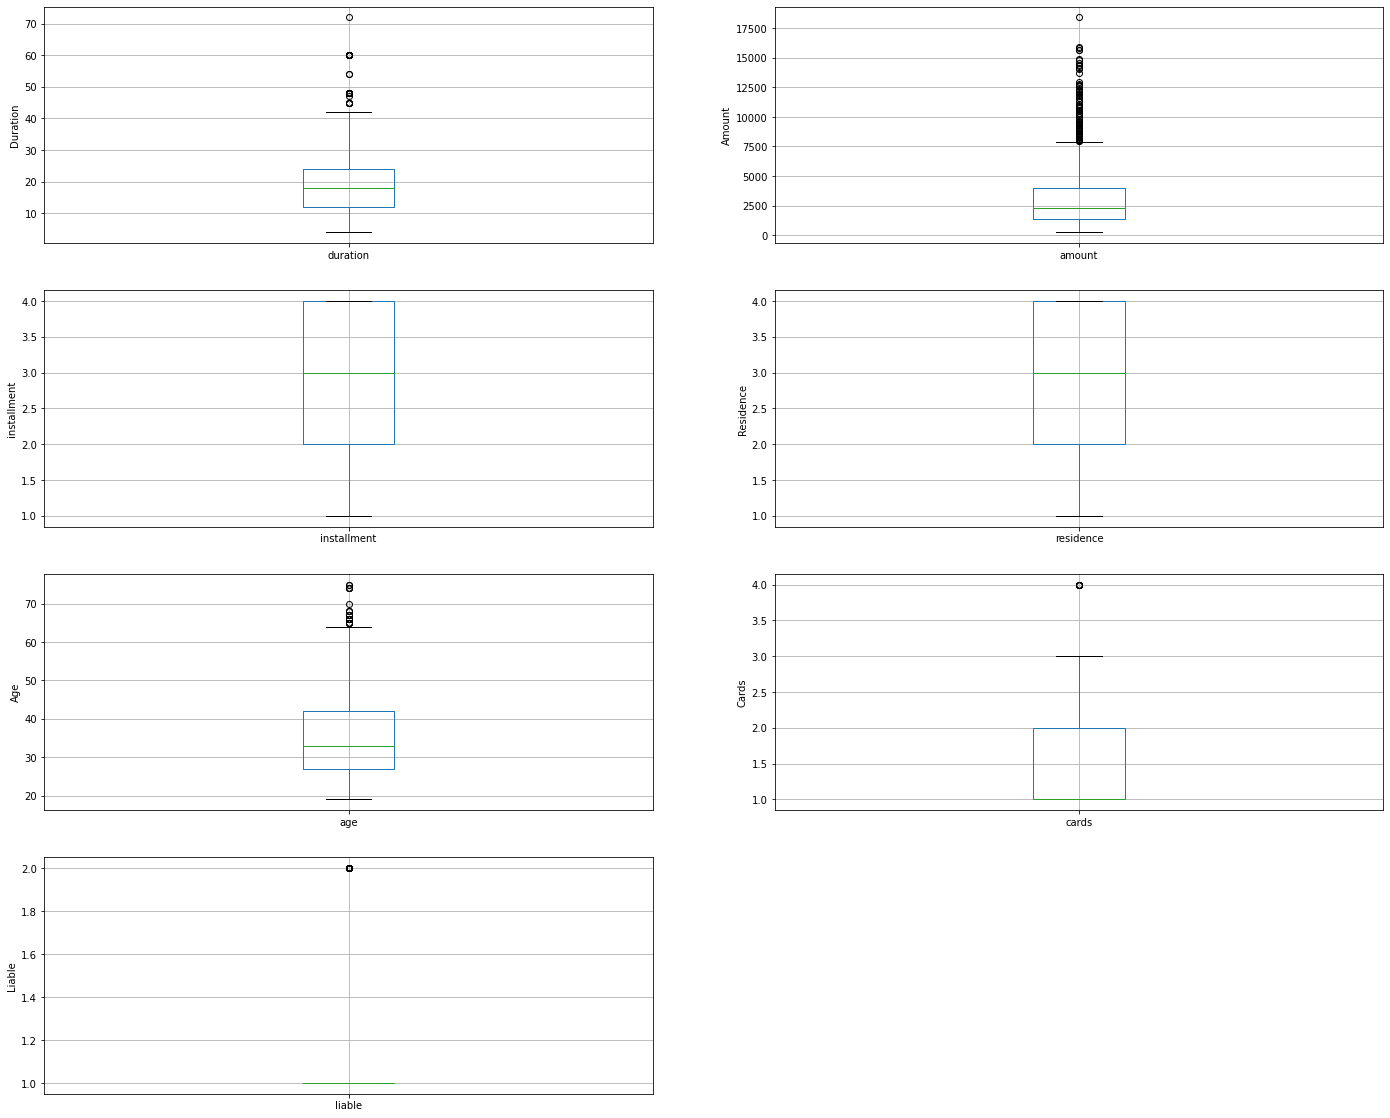

In [14]:
# draw boxplots to visualize outliers
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='duration')
fig.set_title('')
fig.set_ylabel('Duration')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='amount')
fig.set_title('')
fig.set_ylabel('Amount')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='installment')
fig.set_title('')
fig.set_ylabel('installment')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='residence')
fig.set_title('')
fig.set_ylabel('Residence')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='cards')
fig.set_title('')
fig.set_ylabel('Cards')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='liable')
fig.set_title('')
fig.set_ylabel('Liable')


The above boxplots confirm that there are lot of outliers in the variables(duration, amount,age and cards).
                                                                           
Since the dataset has outliers, for SVM to be effective, we should use a high value of C, while training the model.

Low C implies we are allowing more outliers and high C implies less outliers.
                                                                           

Text(0, 0.5, 'Number of GoodCredit')

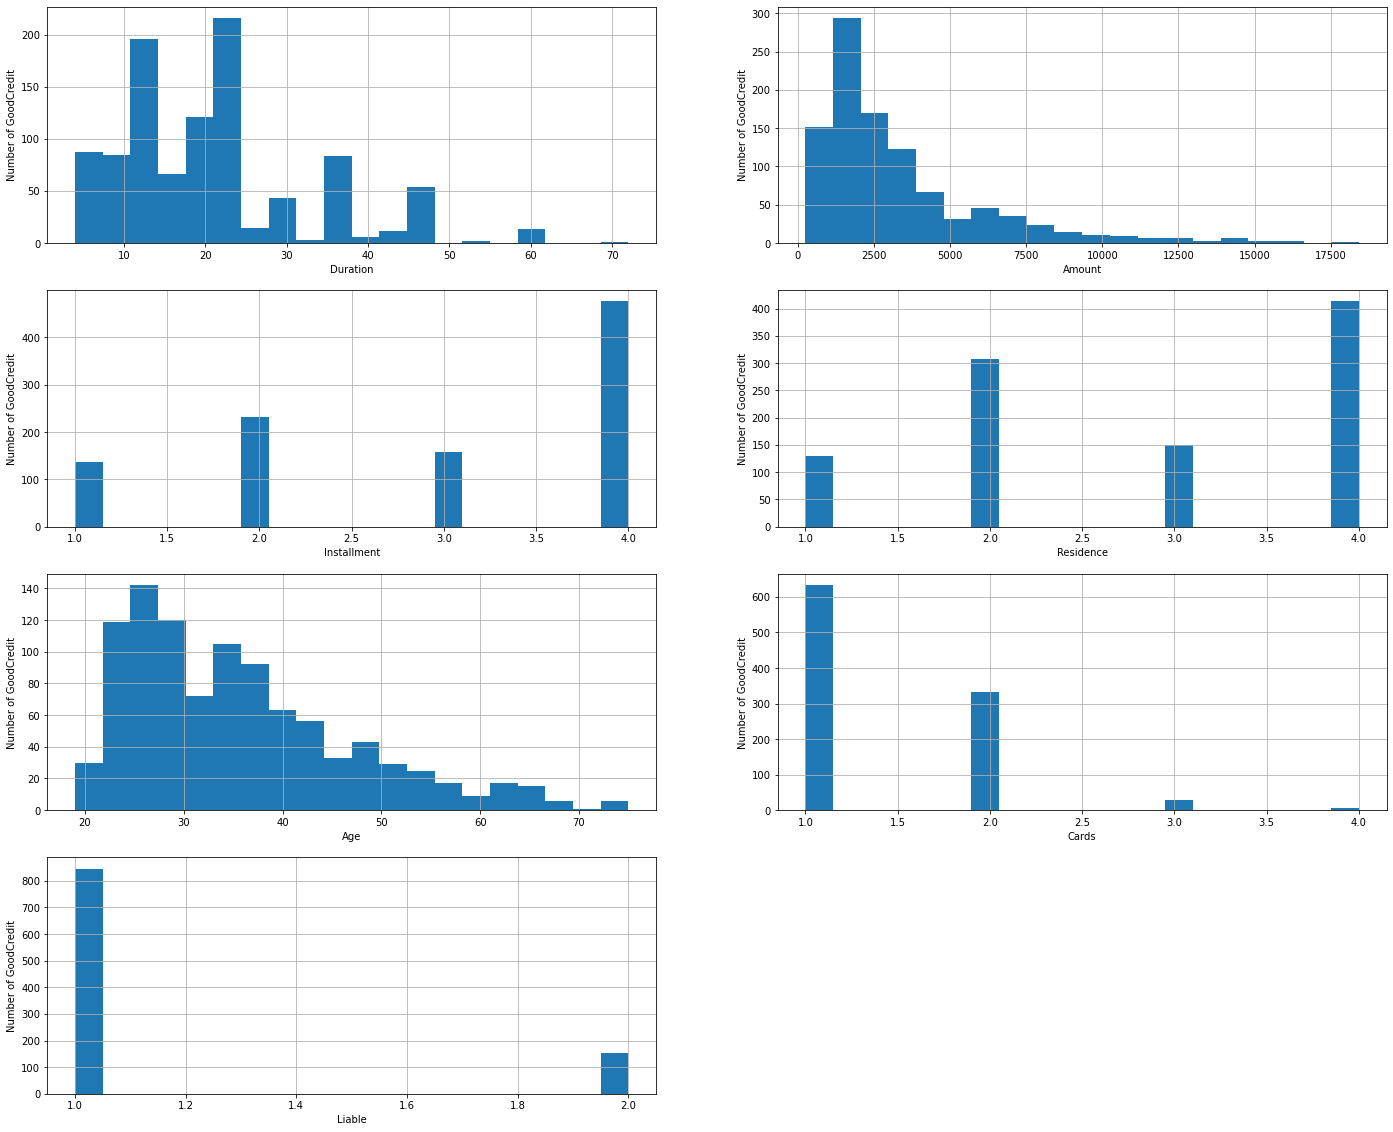

In [15]:
#plot histogram to check distribution
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['duration'].hist(bins=20)
fig.set_xlabel('Duration')
fig.set_ylabel('Number of GoodCredit')


plt.subplot(4, 2, 2)
fig = df['amount'].hist(bins=20)
fig.set_xlabel('Amount')
fig.set_ylabel('Number of GoodCredit')


plt.subplot(4, 2, 3)
fig = df['installment'].hist(bins=20)
fig.set_xlabel('Installment')
fig.set_ylabel('Number of GoodCredit')


plt.subplot(4, 2, 4)
fig = df['residence'].hist(bins=20)
fig.set_xlabel('Residence')
fig.set_ylabel('Number of GoodCredit')


plt.subplot(4, 2, 5)
fig = df['age'].hist(bins=20)
fig.set_xlabel('Age')
fig.set_ylabel('Number of GoodCredit')


plt.subplot(4, 2, 6)
fig = df['cards'].hist(bins=20)
fig.set_xlabel('Cards')
fig.set_ylabel('Number of GoodCredit')

plt.subplot(4, 2, 7)
fig = df['liable'].hist(bins=20)
fig.set_xlabel('Liable')
fig.set_ylabel('Number of GoodCredit')


 We can see that these discrete variables(duration, amount,age and cards) are skewed.

###### OneHot Encoding for continuous variables handling

In [16]:
from sklearn.preprocessing import OneHotEncoder

#one hot encoding of cATEGORICAL VARIABLES BY CREATING DUMMY VARIABLES
dummy_cols = pd.get_dummies(df[categorical_cols])
dummy_cols

,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A30,history_A31,history_A32,history_A33,history_A34,purpose_A40,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,tele_A191,tele_A192,foreign_A201,foreign_A202
0,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
996,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
997,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
998,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [17]:
df_new = pd.concat([df,dummy_cols],axis =1)
df_new.head()

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,tele_A191,tele_A192,foreign_A201,foreign_A202
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,1,0,0,0,1,0,0,1,1,0
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,1,0,0,0,1,0,1,0,1,0
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,1,0,0,1,0,0,1,0,1,0
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,0,1,0,0,1,0,1,0,1,0
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,0,1,0,0,1,0,1,0,1,0


In [18]:
df_encoded = df_new.drop(categorical_cols,axis = 1) 
df_encoded = df_encoded.drop(numeric_cols,axis=1)
df_encoded.head()

,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A30,history_A31,history_A32,history_A33,history_A34,purpose_A40,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,tele_A191,tele_A192,foreign_A201,foreign_A202
0,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0


###### Scaling the numeric variables

In [19]:
#scaling the numeric variables
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(df[numeric_cols].drop('GoodCredit',axis=1))
scaled_columns

array([[-1.23647786, -0.74513141,  0.91847717, ...,  2.76645648,
         1.02707891, -0.42828957],
       [ 2.24819436,  0.94981679, -0.87018333, ..., -1.19140394,
        -0.704926  , -0.42828957],
       [-0.73866754, -0.41656241, -0.87018333, ...,  1.18331231,
        -0.704926  ,  2.33486893],
       ...,
       [-0.73866754, -0.87450324,  0.91847717, ...,  0.21583532,
        -0.704926  , -0.42828957],
       [ 1.9992892 , -0.50552769,  0.91847717, ..., -1.10345149,
        -0.704926  , -0.42828957],
       [ 1.9992892 ,  0.46245715,  0.02414692, ..., -0.75164167,
        -0.704926  , -0.42828957]])

In [20]:
df_scaled = pd.DataFrame(scaled_columns,columns = numeric_cols[1:])
df_scaled

,duration,amount,installment,residence,age,cards,liable
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869
...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290


In [21]:
df_list = [df_scaled,df_encoded]
df_new = pd.concat(df_list,axis=1)
df_new.head()

,duration,amount,installment,residence,age,cards,liable,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,tele_A191,tele_A192,foreign_A201,foreign_A202
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [22]:
df_new.shape

(1000, 61)

### Split feature vector and target variable 

In [23]:
X = df_new
y = df['GoodCredit']

In [24]:
X.shape

(1000, 61)

In [25]:
y.shape

(1000,)

### Visualization to show imbalanced data in target variables

Counter({0: 700, 1: 300})


0    700
1    300
Name: GoodCredit, dtype: int64

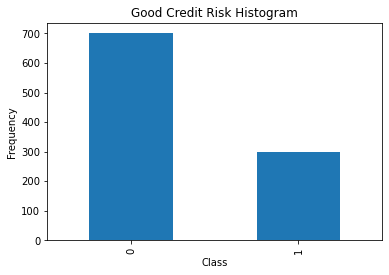

In [26]:
# scatter plot of examples by class label

from collections import Counter
from matplotlib import pyplot

# summarize class distribution
counter = Counter(y)
print(counter)
pd.value_counts(y).plot.bar()
plt.title('Good Credit Risk Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
y.value_counts()

### Split X and y into training and testing sets

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
cols = X_train.columns

In [29]:
# check the shape of X_train and y_train

X_train.shape, y_train.shape

((700, 61), (700,))

In [30]:
# check the shape of X_test and y_test

X_test.shape, y_test.shape

((300, 61), (300,))

### Model building

In [31]:
from  sklearn import svm

#instantiate classifier with default hyperparameters
model = svm.SVC(kernel = 'rbf',C=1.0,gamma = 0.1)

#fit classifier to training set
model.fit(X_train,y_train)

#make predictions
y_pred = model.predict(X_test)


### Check for overfitting and underfitting

In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9414
Test set score: 0.7867


The training-set accuracy score is 0.9387 while the test-set accuracy to be 0.7750. There is overfitting on training data.
#handle overfitting

In SVM, to avoid overfitting, we choose a Soft Margin, instead of a Hard one i.e. we let some data points enter our margin intentionally (but we still penalize it) so that our classifier don’t overfit on our training sample. Here comes an important parameter Gamma (γ), which control Overfitting in SVM. The higher the gamma, the higher the hyperplane tries to match the training data. Therefore, choosing an optimal gamma to avoid Overfitting as well as Underfitting is the key.

### Confusion Matrix

In [33]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[201  13]
 [ 51  35]]

True Positives(TP) =  201

True Negatives(TN) =  35

False Positives(FP) =  13

False Negatives(FN) =  51


The confusion matrix shows 130 + 25 = 155 correct predictions and 12 + 33 = 45 incorrect predictions.

In this case, we have

    - True Positives (Actual Positive:1 and Predict Positive:1) - 130
    - True Negatives (Actual Negative:0 and Predict Negative:0) - 25
    - False Positives (Actual Negative:0 but Predict Positive:1) - 12 (Type I error)
    - False Negatives (Actual Positive:1 but Predict Negative:0) - 13 (Type II error)

<AxesSubplot:>

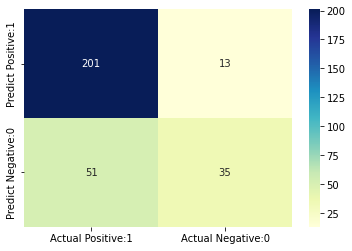

In [34]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Metrices

In [35]:
#accuracy 
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

acc= (TP + TN) / float(TP + TN + FP + FN)
acc


0.7866666666666666

In [36]:
error = (FP + FN) / float(TP + TN + FP + FN)
error

0.21333333333333335

In [37]:
precision = TP / float(TP + FP)
precision

0.9392523364485982

In [38]:
recall = TP / float(TP + FN)
recall

0.7976190476190477

In [39]:
tpr = TP / float(TP + FN)
tpr

0.7976190476190477

In [40]:
fpr = FP / float(FP + TN)
fpr

0.2708333333333333

In [41]:
specificity = TN / (TN + FP)
specificity

0.7291666666666666

### Plot ROC-Curve

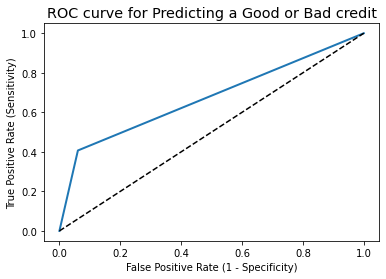

In [42]:
# An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.
#The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.
#ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Good or Bad credit')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [43]:
#ROC AUC is the percentage of the ROC plot that is underneath the curve.
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)
ROC_AUC


0.6731145403173224

ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 0.7. So, we can conclude that our classifier does a moderate job in classifying the Credit risk.

### k-fold cross validation to handle overfitting

k-fold cross-validation is a very useful technique to evaluate model performance. But, it fails here because we have a imbalnced dataset. So, in the case of imbalanced dataset, I will use another technique to evaluate model performance. It is called stratified k-fold cross-validation.

In stratified k-fold cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
model3 = svm.SVC(kernel='poly', C=10)
scores = cross_val_score(model3, X, y, scoring='accuracy', cv=kfold)
  
scores.mean()*100

73.79999999999998

The Accuracy of the model is the average of the accuracy of each fold - 73.79999999999998

### Hyper parameter optimization using GridSearch CV

In [45]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC

# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
model2=svm.SVC() 

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = model2,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [46]:
# best score achieved during the GridSearchCV
grid_search.best_score_


0.7542857142857142

In [47]:
# print parameters that give the best results
grid_search.best_params_

{'C': 10, 'degree': 3, 'gamma': 0.03, 'kernel': 'poly'}

In [48]:
# print estimator that was chosen by the GridSearch
grid_search.best_estimator_

SVC(C=10, gamma=0.03, kernel='poly')

In [49]:
# calculate GridSearch CV score on test set
grid_search.score(X_test, y_test)

0.7766666666666666

### GridSearch CV helped to identify the parameters that will improve the performance for this particular model-
    -'C'  =  10, 
    -'degree' = 3, 
    -'gamma' = 0.03, 
    -'kernel': 'poly'

### Classification metrics without SMOTE

In [50]:
#print 
from sklearn.metrics import classification_report

classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.94      0.86       214\n           1       0.73      0.41      0.52        86\n\n    accuracy                           0.79       300\n   macro avg       0.76      0.67      0.69       300\nweighted avg       0.78      0.79      0.77       300\n'

#### SMOTE algorithm works in 4 simple steps:

- Choose a minority class as the input vector
- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and    its chosen neighbor
- Repeat the steps until data is balanced

In [51]:
from imblearn.over_sampling import SMOTE

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("Before OverSampling, counts of GoodCredit label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of GoodCredit label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

###handle imbalanced data
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, the shape of train_X: (700, 61)
Before OverSampling, the shape of train_y: (700,) 

Before OverSampling, counts of GoodCredit label '1': 214
Before OverSampling, counts of GoodCredit label '0': 486 

After OverSampling, the shape of train_X: (972, 61)
After OverSampling, the shape of train_y: (972,) 

After OverSampling, counts of label '1': 486
After OverSampling, counts of label '0': 486


### Classification metrics with SMOTE

In [52]:
model1 = svm.SVC(kernel = 'rbf',C=1.0,gamma = 0.1)

#fit classifier to resampled training set
model1.fit(X_train_res,y_train_res)

#make predictions
print(classification_report(y_test,model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       214
           1       0.62      0.50      0.55        86

    accuracy                           0.77       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300



### Conclusion

Our SVM classifier is a moderate quality one with an accuracy score of 0.77.
